# Visualize flow data of a sensor 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
label_file = 'data/label.npy'
STAWAVE_pred_file = 'data/STWave_pred.npy'
DDGCRN_pred_file = 'data/MO_D_pred.npy'

In [80]:
# STWAVE and DDGCRN differ only of 5 samples. We adapt that with unseen first 5  DDGCRN predictions
STWAVE_true = np.load(label_file).squeeze()
STWAVE_pred = np.load(STAWAVE_pred_file).squeeze()
DDGCRN_pred = np.load(DDGCRN_pred_file)[5:].squeeze()
sensor_num = 250

In [81]:
print(f'STWAVE:{STWAVE_pred.shape} - DDGCRN: {DDGCRN_pred.shape}')

STWAVE:(588, 4, 259) - DDGCRN: (588, 4, 259)


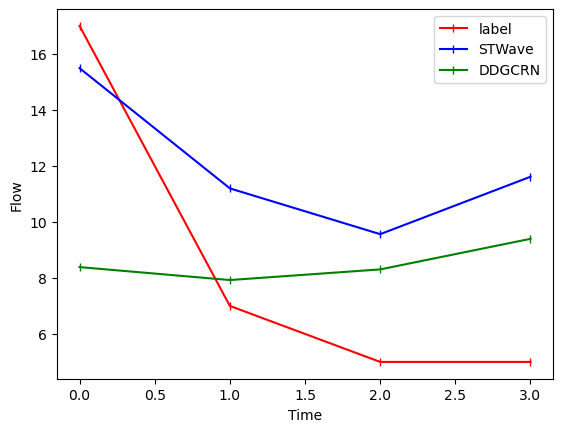

In [6]:
# example of a single 4 lag of a measurament of a sensor
l = STWAVE_true[30,:,sensor_num]
STWAVE_p = STWAVE_pred[30,:,sensor_num]
DDGCRN_p = DDGCRN_pred[30,:,sensor_num]
fig, ax = plt.subplots(1,1)
ax.plot(l, '-|r', label='label')
ax.plot(STWAVE_p, '-|b',label='STWave')
ax.plot(DDGCRN_p, '-|g',label='DDGCRN')

ax.set_xlabel('Time')
ax.set_ylabel('Flow')
ax.legend()

plt.savefig('single_lag_comparison.png')

[640. 480.]


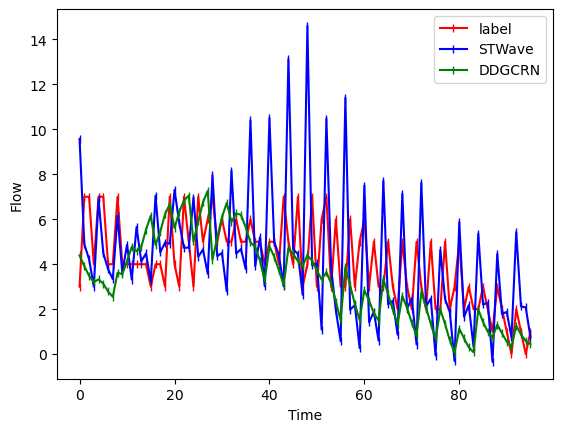

In [82]:
# example of all measurament of a single sensor 
l_sensor = STWAVE_true[:,:,sensor_num].flatten()
STWAVE_p = STWAVE_pred[:,:,sensor_num].flatten()
DDGCRN_p = DDGCRN_pred[:,:,sensor_num].flatten()


fig, ax = plt.subplots(1,1)
ax.plot(l_sensor[:96], '-|r', label='label')
ax.plot(STWAVE_p[:96], '-|b',label='STWave')
ax.plot(DDGCRN_p[:96], '-|g',label='DDGCRN')

ax.set_xlabel('Time')
ax.set_ylabel('Flow')
ax.legend()
print(fig.get_size_inches()*fig.dpi)
plt.savefig('all_values_comparison_4.png')

In [35]:
dict_metric = {'MAE':[[7.1232, 7.9644, 8.2254, 9.1150],[5.3420, 5.6698, 5.8831, 6.1754]],
               'RMSE': [[18.6681,22.4812,22.9275,25.4635],[16.3672,19.1766,20.8813,22.4960]],
               'MAPE': [[33.90,35.54,37.06,40.10],[31.35,32.18,32.99,34.00]]
               }

for i,m in enumerate(dict_metric.keys()):
    print(f'{i}: -> {m} -> STWave: {dict_metric[m][0]}\t DDGCRN: {dict_metric[m][1]}')

0: -> MAE -> STWave: [7.1232, 7.9644, 8.2254, 9.115]	 DDGCRN: [5.342, 5.6698, 5.8831, 6.1754]
1: -> RMSE -> STWave: [18.6681, 22.4812, 22.9275, 25.4635]	 DDGCRN: [16.3672, 19.1766, 20.8813, 22.496]
2: -> MAPE -> STWave: [33.9, 35.54, 37.06, 40.1]	 DDGCRN: [31.35, 32.18, 32.99, 34.0]


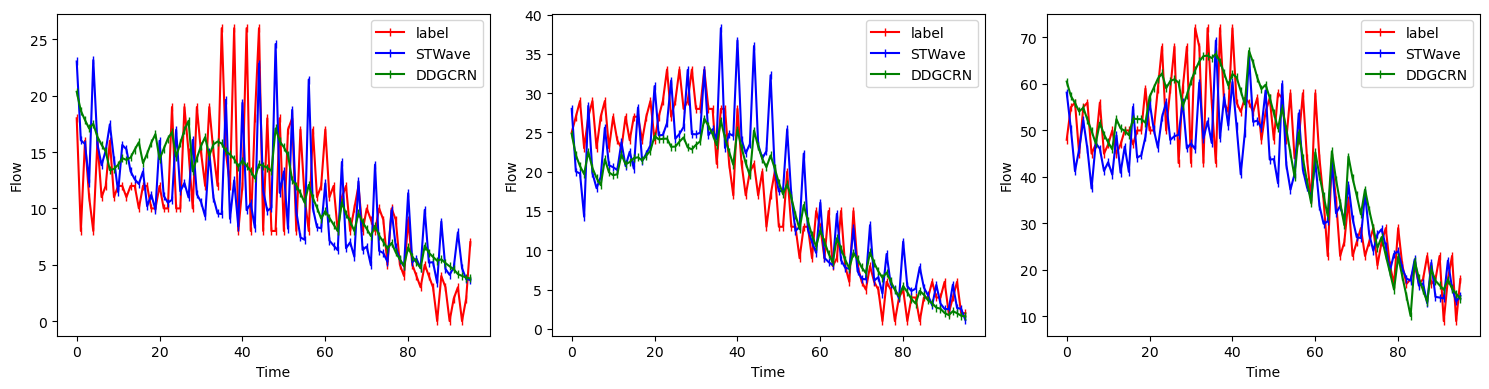

In [85]:

fig, ax = plt.subplots(1, 3, figsize=(15,4))
sensors = [18,96,200]
for i,sensor in enumerate(sensors):
    
    l_sensor = STWAVE_true[:,:,sensor].flatten()
    STWAVE_p = STWAVE_pred[:,:,sensor].flatten()
    DDGCRN_p = DDGCRN_pred[:,:,sensor].flatten()
    ax[i].plot(l_sensor[:96], '-|r', label='label')
    ax[i].plot(STWAVE_p[:96], '-|b',label='STWave')
    ax[i].plot(DDGCRN_p[:96], '-|g',label='DDGCRN')
    ax[i].set_xlabel('Time')
    ax[i].set_ylabel('Flow')
    ax[i].legend()

plt.tight_layout()
plt.savefig('./img/sensors_comparison.png')

[250.  66.]


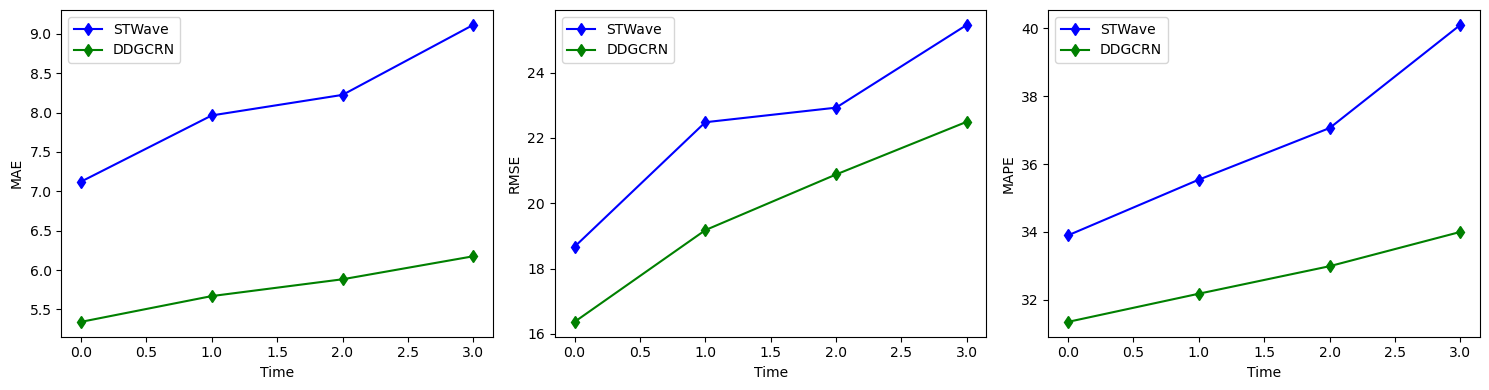

In [86]:
# horizon comparison MAE for all metrics together:

dict_metric = {'MAE':[[7.1232, 7.9644, 8.2254, 9.1150],[5.3420, 5.6698, 5.8831, 6.1754]],
               'RMSE': [[18.6681,22.4812,22.9275,25.4635],[16.3672,19.1766,20.8813,22.4960]],
               'MAPE': [[33.90,35.54,37.06,40.10],[31.35,32.18,32.99,34.00]],
               }

fig, ax = plt.subplots(1, 3, figsize=(15,4))

for i, m in enumerate(dict_metric.keys()):
    
    ax[i].plot(dict_metric[m][0], '-db', label='STWave')
    ax[i].plot(dict_metric[m][1], '-dg', label='DDGCRN')
    ax[i].set_xlabel('Time')
    ax[i].set_ylabel(m)
    ax[i].legend()

print(fig.get_size_inches()*fig.dpi // 6)
plt.tight_layout()
plt.savefig('./img/metric_comparison.png')

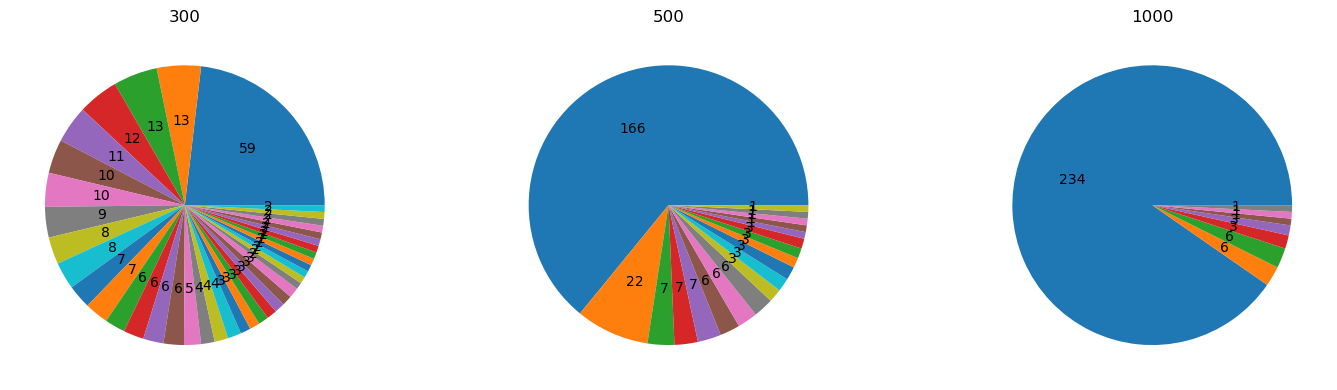

In [14]:
# pie chart for graph wcc
parts = [300, 500, 1000]

fig, ax = plt.subplots(1, 3, figsize=(15,4))
for i,part in enumerate(parts):
    df = pd.read_csv(f'./data/{part}.csv')
    ax[i].pie(df['sensor_count'], autopct=lambda pct: f'{int(pct/100.*sum(df["sensor_count"]))}')
    ax[i].set_title(f'{part}')
plt.tight_layout()
plt.savefig('./img/pie_comparison.png')